In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import seaborn.objects as so
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
dots = sns.load_dataset("dots")
fmri = sns.load_dataset("fmri")
flights = sns.load_dataset("flights")
anagrams = sns.load_dataset("anagrams")
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
healthexp = sns.load_dataset("healthexp")
flights_wide = flights.pivot(index="year", columns="month", values="passengers")


# Visualizing statistical relationships
- 
- 
- 통계 분석은 데이터 집합의 변수가 서로 어떻게 관련되어 있는지, 그리고 이러한 관계가 다른 변수와는 어떤 연관이 있는지 이해하는 프로세스입니다. 
- 데이터를 제대로 시각화하면 관계를 나타내는 추세와 패턴을 볼 수 있기 때문에 시각화는 통계분석에서 핵심 구성 요소가 될 수 있습니다.
- 이 튜토리얼에서는 세 가지 함수에 대해 설명합니다. 
- 가장 많이 사용할 함수는 relplot()입니다. 이 함수는 scatter plots와 line plots을 사용하여 통계적 관계를 시각화하는 figure-level 함수입니다. 
- relplot()은 FacetGrid를 두 축 수준 함수 중 하나와 결합합니다:
- 
- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")
- 
- 이러한 함수는 간단하고 이해하기 쉬운 데이터 표현을 사용하지만 복잡한 데이터 집합 구조를 나타낼 수 있기 때문에 매우 유용합니다. 
- 색조, 크기 및 스타일의 의미를 사용하여 최대 3개의 추가 변수를 매핑하여 향상시킬 수 있는 2차원 그래픽을 그릴 수도있습니다.

## Relating variables with scatter plots
- scatter plot은 통계 시각화의 메인입니다. 
- 산점도는 점의 구름을 사용하여 두 변수의 공동 분포를 나타내며, 각 점은 데이터 집합의 관측치를 나타냅니다. 
- 예시를 통해 두 변수 간에 의미 있는 관계가 있는지 여부에 대한 정보를 여러개 추론할 수 있습니다.
- 
- seaborn에서 산점도를 그리는 방법은 여러 가지가 있습니다. 
- 가장 기본적인 방법은 두 변수가 모두 숫자인 경우에 사용해야 하는 scatterplot() 함수입니다.
- 범주형 시각화(categorical visualization) 자습서에서는 산점도를 사용하여 범주형 데이터를 시각화하는 특수 도구를 살펴봅니다. 
- scatterplot()은 relplot()의 기본 종류입니다 kind="scatter"를 설정하여 강제로 지정할 수도 있습니다.

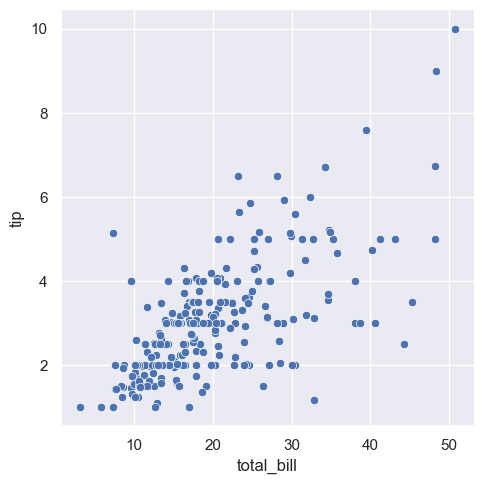

In [7]:
# total_bill 과 tip 은 양의 상관관계를 가지고 있는 것을 볼 수 있다. 

sns.relplot(data=tips, x="total_bill", y="tip");

- 포인트가 2차원으로 그려지는 동안 세 번째 변수에 따라 포인트에 색상을 지정하여 다른 차원을 플롯에 추가할 수 있습니다. 
- seaborn에서는 포인트의 색상에 의미를 부여하기 때문에 이를 'hue semantic'을 사용한다고 합니다:

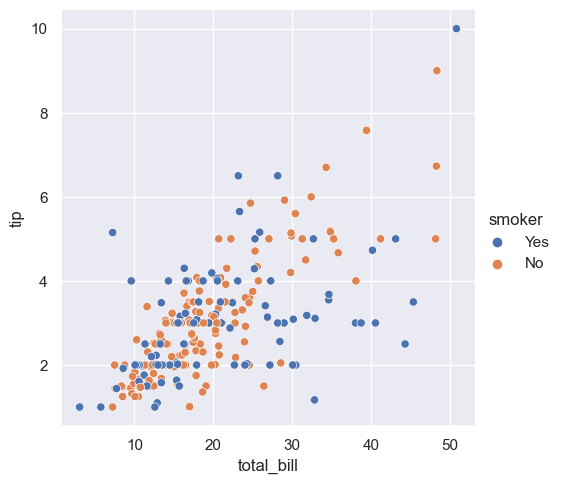

In [6]:
# 그리고 smoker 여부를 hue 로 지정해 색상을 구분시켰다. 

sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker");

- 클래스 간의 차이를 강조하고 accessibility를 향상시키기 위해 각 클래스에 다른 마커 스타일을 사용할 수 있습니다.

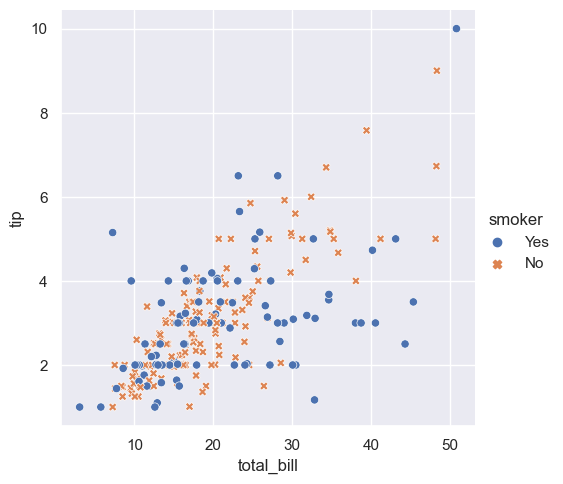

In [10]:
# style 을 통해 smoker인지 차이에 따라 마커의 모양을 변경시켰다. 

sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker");

- 각 포인트의 색조와 스타일을 독립적으로 변경하여 네 가지 변수를 표현할 수도 있습니다. 
- 그러나 우리가 볼때 모양은 구분이 잘 안되기 때문에 이 작업을 한다면 고민을 하고 결정해야 합니다. 

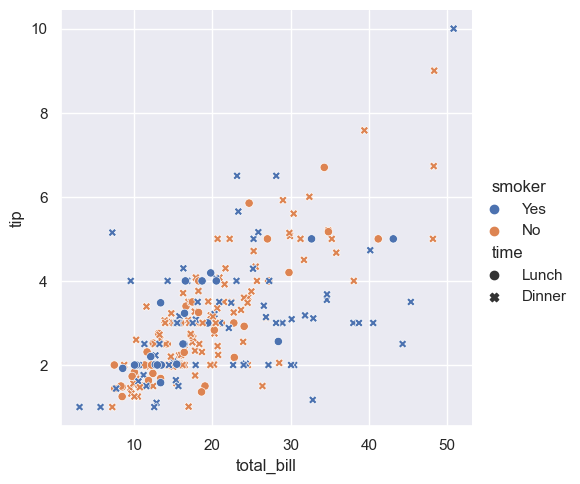

In [13]:
# 지금 색상과 마커가 다 다른 변수가 입력되어 있어서 구분이 잘 되지 않기는 하다.

sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
);

- 위의 예에서는 hue semantic이 범주형이었으므로 default qualitative palette가 적용되었습니다. 
- hue semantic이 숫자인 경우(특히 float) 기본 색상은 sequential palette 입니다

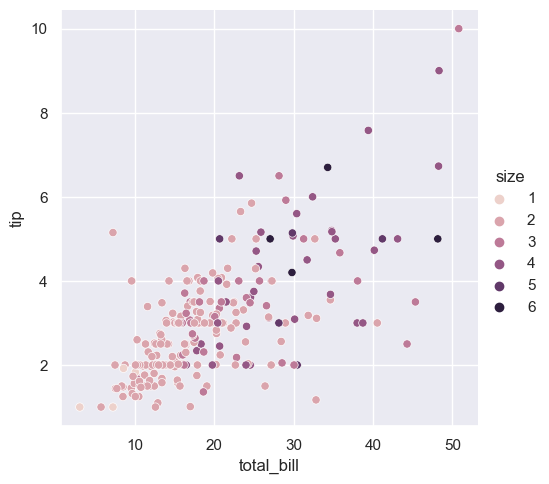

In [15]:
# hue가 숫자 형태면, 숫자의 범위에 맞춰 색이 진해지는 형식으로 출력이 된다.  
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
);

- 두 경우 모두 색상 팔레트를 사용자 지정할 수 있습니다. 
- 이를 위한 다양한 옵션이 있습니다. 
- 여기서는 문자열 인터페이스를 사용하여 cubehelix_palette()에 대한 sequential palette를 사용자 정의합니다

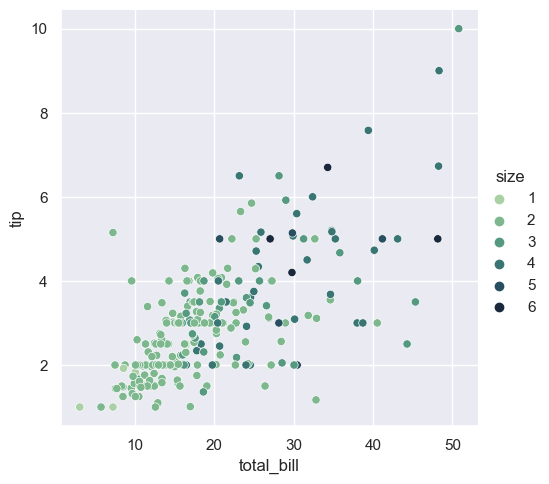

In [16]:
# 색의 범위를 지정해준 듯 하다. 
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
);

- 세 번째 종류의 시맨틱 변수는 각 점의 크기를 변경하는 것입니다. 

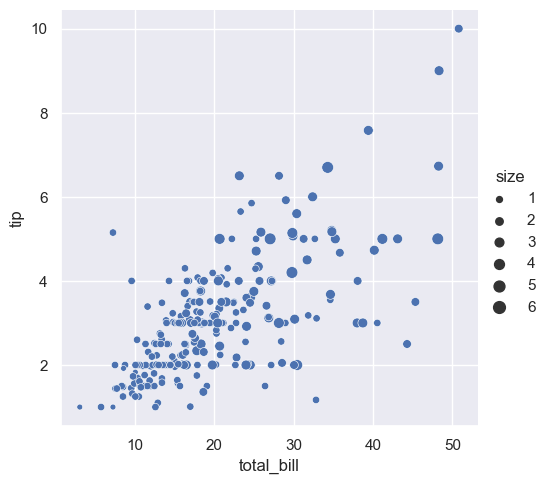

In [17]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size");

- matplotlib.pyplot.scatter()와 달리, 
- 변수의 리터럴 값은 점의 면적을 선택하는 데 사용되지 않습니다. 
- 대신 데이터 단위의 값 범위가 면적 단위의 범위로 정규화됩니다. 
- 이 범위는 사용자 지정할 수 있습니다
- 통계적 관계를 표시하기 위해 다양한 의미를 사용하는 방법을 사용자 정의하는 더 많은 예는 scatterplot() API 예제에 나와 있습니다.

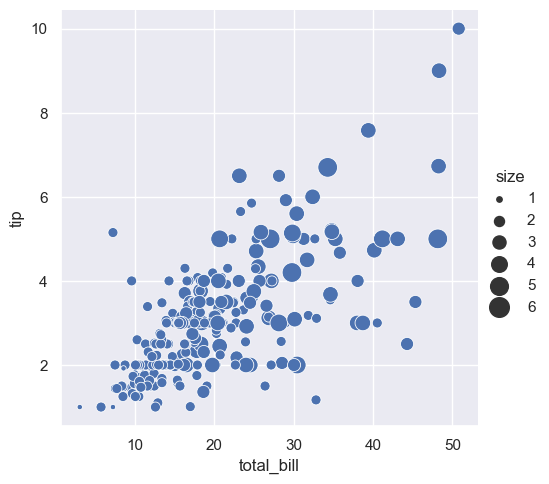

In [18]:
# 우리가 size를 지정할 수 있다. 
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
);